In [2]:
import pandas as pd
import os
import sys
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm

%matplotlib inline

sys.stderr.write('Imported required packages.\n')


Imported required packages.


<a id = ''></a>
## Data read-in

The input files used here are all available on the Panorama Project https://panoramaweb.org/matrix-matched_calcurves.url

The three files are the output files of running the proposed calibration curve fitting model to these matched matrix curves. All three data sets are yeast proteome diluted in a different matrix following the same dilution scheme (yeast diluted in water, yeast diluted in HeLa, yeast diluted in 15N-shifted yeast).

In [3]:
project_dir = "G:/Shared drives/Lindsay Pino/proj/CalibratedQuant_DIA-MS/"

# read in LOQ files
loq_water = pd.read_csv("G:/Shared drives/Lindsay Pino/proj/CalibratedQuant_DIA-MS/results/curves/water_curves/figuresofmerit.csv")
loq_hela = pd.read_csv("G:/Shared drives/Lindsay Pino/proj/CalibratedQuant_DIA-MS/results/curves/hela_curves/figuresofmerit.csv")
loq_yeast = pd.read_csv("G:/Shared drives/Lindsay Pino/proj/CalibratedQuant_DIA-MS/results/figuresofmerit_yeast2std.csv")

loq_water.head()

,LOD,LOQ,intercept_linear,intercept_noise,peptide,slope_linear,stdev_noise,stndev_noise
0,0.055009,0.436823,-30821.094240,0.330025,LRGALELLWR,763298.869283,NaN,5583.406116
1,NaN,inf,0.000000,0.000000,LTGNPELSSLDEVLAK,0.000000,NaN,NaN
2,NaN,inf,0.001985,0.001985,GMIVTYNDVSATQDK,0.000000,NaN,NaN
3,NaN,inf,0.000000,0.000000,TNTITSDFTTSTDR,0.000000,NaN,NaN
4,0.004666,inf,-1980.655749,-0.000023,TFVSETADDIEK,424481.131821,NaN,0.000000


In [4]:
## merge dataframes together to have all LOQs in one place

loq_water.rename(columns={'LOQ': 'LOQ_water'}, inplace=True)
loq_hela.rename(columns={'LOQ': 'LOQ_hela'}, inplace=True)
loq_yeast.rename(columns={'LOQ': 'LOQ_yeast'}, inplace=True)

loq_all = pd.merge(pd.merge(loq_water[['peptide','LOQ_water']], loq_hela[['peptide', 'LOQ_hela']], on='peptide', how='outer'),
                   loq_yeast[['peptide', 'LOQ_yeast']], on='peptide', how='inner')

#loq_all = loq_all.replace([np.inf, -np.inf], np.nan)

sys.stdout.write("%d peptides in water\n" % len(loq_water['peptide'].drop_duplicates()))
sys.stdout.write("%d peptides in hela\n" % len(loq_hela['peptide'].drop_duplicates()))
sys.stdout.write("%d peptides in yeast\n" % len(loq_yeast['peptide'].drop_duplicates()))
sys.stdout.write("%d peptides in all\n" % len(loq_all['peptide'].drop_duplicates()))

loq_all.head(25)

27960 peptides in water
21289 peptides in hela
24400 peptides in yeast
22254 peptides in all


,peptide,LOQ_water,LOQ_hela,LOQ_yeast
0,LRGALELLWR,0.436823,inf,inf
1,LTGNPELSSLDEVLAK,inf,NaN,inf
2,GMIVTYNDVSATQDK,inf,inf,inf
3,TFVSETADDIEK,inf,inf,inf
4,EEEANAAVDNIFEEK,inf,NaN,inf
5,SVQDWVYATIYSIAPELR,inf,inf,inf
6,ISLNLELPVPDNDPPEK,0.160677,inf,inf
7,LSSLSYEIFEGSK,inf,inf,inf
8,ETPIFLESLTR,inf,NaN,inf
9,RPYESSR,inf,inf,inf


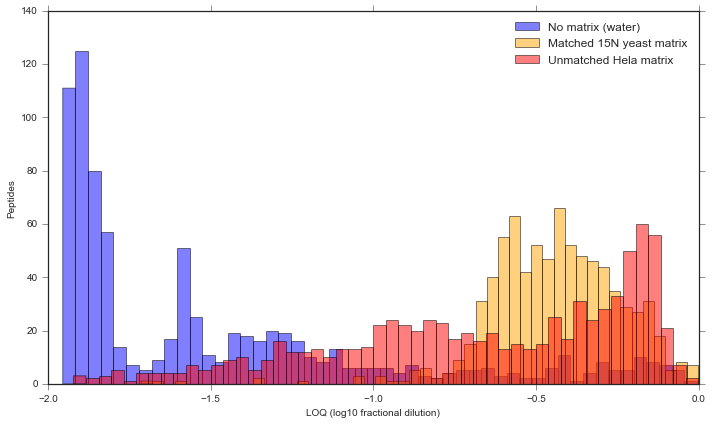

In [5]:
temp = loq_all.replace([np.inf, -np.inf], np.nan).dropna()

plt.style.use('seaborn-ticks')

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(np.log10(temp['LOQ_water']), bins=50, color='blue', alpha=0.5, label='No matrix (water)')
ax.hist(np.log10(temp['LOQ_yeast']), bins=50, color='orange', alpha=0.5, label='Matched 15N yeast matrix')
ax.hist(np.log10(temp['LOQ_hela']), bins=50, color='red', alpha=0.5, label='Unmatched Hela matrix')

# add labels
fig.suptitle('', fontsize=16)
plt.xlabel('LOQ (log10 fractional dilution)')
plt.ylabel('Peptides')
ax.legend()

plt.tight_layout()
#plt.savefig(os.path.join(project_dir, './results/matrixeffect_watervs15n.png'))